In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
from tensorflow.keras.layers import Bidirectional

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train=np.load("./drive/My Drive/audio_train.npy")
test=np.load("./drive/My Drive/audio_test.npy")

In [5]:
train_labels=pd.read_csv("./drive/My Drive/labels_train.csv")
sample_submission=pd.read_csv("./drive/My Drive/sample_submission.csv")

In [ ]:
train_labels

,id,label
0,0,5
1,1,1
2,2,1
3,3,0
4,4,9
...,...,...
937,937,9
938,938,1
939,939,1
940,940,5


In [6]:
label = list(train_labels['label'])

y_train = np.empty([len(train),1])
for i in range(len(label)):
  y_train[i] = label[i]
y_train = np.array(y_train, dtype='uint8')

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)

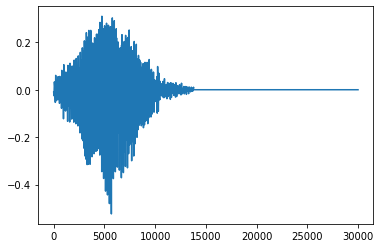

In [ ]:
plt.plot(train[2])

In [ ]:
print(train_labels.label.unique())

[5 1 0 9 4 6 7 3 8]


In [ ]:
print(sample_submission.label.unique())

[ 1  6  3  7  4  8  9  5  2  0 10]


In [ ]:
print(np.shape(test)[1])

30000


In [7]:
verbose, epochs, batch_size = 0, 10, 32

In [8]:
n_timesteps, n_features, n_outputs = train.shape[0], train.shape[1], train_labels.shape[0]

In [9]:
n_timesteps

942

In [10]:
train.shape[0],train.shape[1]

(942, 30000)

In [11]:
train1=np.reshape(train,(train.shape[0],500,60,1))
train1.shape

(942, 500, 60, 1)

In [12]:
test1=np.reshape(test,(test.shape[0],500,60,1))
test1.shape

(558, 500, 60, 1)

In [13]:
train_labels.shape

(942, 2)

In [14]:
train.shape[1]

30000

In [15]:
from keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional, ELU, Conv2D, MaxPooling2D,Flatten,Dropout
from keras.models import Sequential
from keras.utils import Sequence
from keras.layers import LSTM

In [16]:
input_shape=(500,60,1)

In [17]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(500,60,1)))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))


In [ ]:
#Define Model
model = models.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(500,60,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 500, 60, 32)       320       
_________________________________________________________________
activation (Activation)      (None, 500, 60, 32)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 498, 58, 64)       18496     
_________________________________________________________________
activation_1 (Activation)    (None, 498, 58, 64)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 249, 29, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 249, 29, 64)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 249, 29, 64)       3

no

In [20]:
from keras import regularizers, optimizers

In [23]:
model.compile(optimizers.RMSprop(lr=0.0005, decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])
history = model.fit(train1, y_train, epochs=200)

Epoch 1/200
30/30 [==============================] - 4s 124ms/step - loss: 0.3384 - accuracy: 0.9501
Epoch 2/200
30/30 [==============================] - 4s 124ms/step - loss: 0.1101 - accuracy: 0.9682
Epoch 3/200
30/30 [==============================] - 4s 124ms/step - loss: 0.1584 - accuracy: 0.9862
Epoch 4/200
30/30 [==============================] - 4s 124ms/step - loss: 0.2462 - accuracy: 0.9735
Epoch 5/200
30/30 [==============================] - 4s 124ms/step - loss: 0.0675 - accuracy: 0.9777
Epoch 6/200
30/30 [==============================] - 4s 124ms/step - loss: 0.1069 - accuracy: 0.9777
Epoch 7/200
30/30 [==============================] - 4s 124ms/step - loss: 0.2171 - accuracy: 0.9788
Epoch 8/200
30/30 [==============================] - 4s 124ms/step - loss: 0.0718 - accuracy: 0.9915
Epoch 9/200
30/30 [==============================] - 4s 124ms/step - loss: 0.1165 - accuracy: 0.9618
Epoch 10/200
30/30 [==============================] - 4s 124ms/step - loss: 0.1497 - accura

In [24]:
pred = model.predict(test1)

In [25]:
np.argmax(pred[1])

9

In [26]:
predLabel = np.empty([len(test),2],dtype=int)
for i in range(len(pred)):
  predLabel[i][0] = np.int(i)
  predLabel[i][1] = np.int(np.argmax(pred[i]))


In [27]:
df = pd.DataFrame(predLabel, columns= ['id', 'label'])

df.to_csv (r'haiqzhu9.csv', index = False, header=True)

In [ ]:
sample_submission

,id,label
0,0,1
1,1,6
2,2,3
3,3,7
4,4,4
...,...,...
553,553,6
554,554,0
555,555,2
556,556,9


In [ ]:
df

,id,label
0,0,5
1,1,9
2,2,4
3,3,1
4,4,4
...,...,...
553,553,1
554,554,5
555,555,5
556,556,7
